<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#最近邻" data-toc-modified-id="最近邻-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>最近邻</a></span><ul class="toc-item"><li><span><a href="#算法（'auto',-'ball_tree',-'kd_tree',-'brute'）" data-toc-modified-id="算法（'auto',-'ball_tree',-'kd_tree',-'brute'）-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>算法（'auto', 'ball_tree', 'kd_tree', 'brute'）</a></span></li><li><span><a href="#找到最近邻" data-toc-modified-id="找到最近邻-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>找到最近邻</a></span></li></ul></li></ul></div>

# 最近邻

sklearn.neighbors 提供了 neighbors-based (基于邻居的) 无监督学习以及监督学习方法的功能。 无监督的最近邻是许多其它学习方法的基础，尤其是 **manifold learning (流行学习)** 和 **spectral clustering (谱聚类)**。 neighbors-based (基于邻居的) 监督学习分为两种： classification （分类）针对的是具有离散标签的数据，regression （回归）针对的是具有连续标签的数据。

最近邻方法背后的原理是从训练样本中找到与新点在距离上最近的预定数量的几个点，然后从这些点中预测标签。 这些点的数量可以是用户自定义的常量（K-最近邻学习）， 也可以根据不同的点的局部密度（基于半径的最近邻学习）。距离通常可以通过任何度量来衡量： standard Euclidean distance（标准欧式距离）是最常见的选择。Neighbors-based（基于邻居的）方法被称为 **非泛化 机器学习方法**， 因为它们只是简单地”记住”了其所有的训练数据（可能转换为一个快速索引结构，如 Ball Tree 或 KD Tree）。

尽管它简单，但最近邻算法已经成功地适用于很多的分类和回归问题，例如手写数字或卫星图像的场景。 作为一个**non-parametric非参数化**方法，它经常成功地应用于决策边界非常不规则的分类情景下。

sklearn.neighbors 可以处理 Numpy 数组或 scipy.sparse 矩阵作为其输入。 对于密集矩阵，大多数可能的距离度量都是支持的。对于稀疏矩阵，支持搜索任意的 Minkowski 度量。

许多学习路径/方法都是依赖最近邻作为核心。 一个例子是 核密度估计 , 在 密度估计 章节中有讨论。

## 算法（'auto', 'ball_tree', 'kd_tree', 'brute'）
NearestNeighbors （最近邻）实现了 unsupervised nearest neighbors learning（无监督的最近邻学习）。 它为三种不同的最近邻算法提供统一的接口：BallTree, KDTree, 还有基于 sklearn.metrics.pairwise 的 brute-force 算法。算法的选择可通过关键字 'algorithm' 来控制， 并必须是 ['auto', 'ball_tree', 'kd_tree', 'brute'] 其中的一个。当默认值设置为 'auto' 时，算法会尝试从训练数据中确定最佳方法。

 关于最近邻算法，如果邻居 k+1 和邻居 k 具有相同的距离，但具有不同的标签， 结果将取决于训练数据的顺序。

## 找到最近邻
为了完成找到两组数据集中最近邻点的简单任务, 可以使用 sklearn.neighbors 中的无监督算法:

In [2]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
indices                                           

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]], dtype=int64)

In [2]:
distances

array([[ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.41421356],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.41421356]])

In [3]:
nbrs.kneighbors_graph(X).toarray()

array([[ 1.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  1.]])

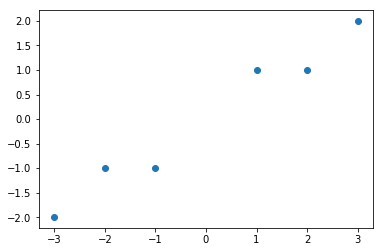

In [5]:
%matplotlib inline
from matplotlib import pylab as plt

plt.figure()
X = np.array([-1, -2, -3, 1, 2, 3,])
y = np.array([-1, -1, -2, 1, 1, 2])
plt.scatter(X,y)
plt.show()


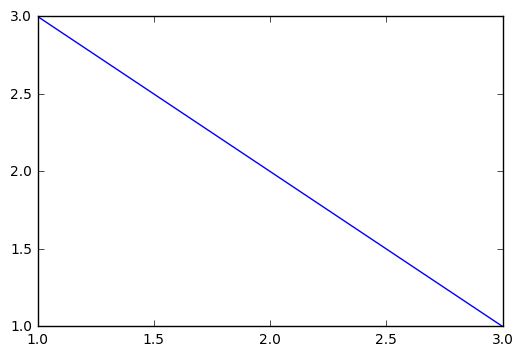

In [1]:
import matplotlib.pyplot as plt

plt.plot([1,2,3],[3,2,1])
plt.show()

In [39]:
import pickle

In [43]:
output = open('filef.pkl','wb')
pickle.dump(f,output,pickle.HIGHEST_PROTOCOL)
output.close()

TypeError: 'numpy.ndarray' object is not callable